# Loading all the libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from plotnine import *
import scipy.stats as st
from scipy.interpolate import interp1d

sn.set(font_scale=1.4)#for label size

from matplotlib.ticker import MaxNLocator
%matplotlib inline

In [2]:
fileprefix = "../CardStockXam/bin/Release/games/"
count = {"AllAI":100, 
         "AllRnd":100, 
         "RndandAI":100}
typename = {"AllAI":"All AI Players", 
            "AllRnd":"Random Players", 
            "RndandAI":"One AI, Rest Random Players"}

cbbPalette = ["#D55E00", "#009E73", "#0072B2", "#000000", "#CC79A7" ]


# Game Information

Each experiment should be on a different line in "games".
(Should this be a data frame as well??)

In [3]:
games = [
    {"file":"Hearts","name":"Hearts", "player": 4},
    {"file":"HeartsNoMoon","name":"Broken Hearts", "player": 4},
    {"file":"BlackLady","name":"Black Lady", "player": 4},
    {"file":"PureHearts","name":"Pure Hearts", "player": 4},
    {"file":"BlackMaria","name":"Black Maria", "player": 4},
    {"file":"HeartsOmnibus","name":"Omnibus Hearts", "player": 4},
    {"file":"Hearts7Q","name":"Grey Lady", "player": 4},
    {"file":"WidowHearts","name":"Widow Hearts", "player": 4},
    {"file":"SpotHearts","name":"Spot Hearts", "player": 4},
    {"file":"Polignac","name":"Polignac", "player": 4},
    {"file":"SlobberHannes","name":"SlobberHannes", "player": 4},
    {"file":"CheeseheadsPicker","name":"Cheeseheads Picker", "player": 5},
    {"file":"CheeseheadsLeaster","name":"Cheeseheads Leaster", "player": 5},
    {"file":"SheepsheadPicker","name":"Sheepshead Picker", "player": 5},
    {"file":"CheeseheadPickerBury","name":"Cheeseheads Picker Bury", "player": 5},
    {"file":"Enchere","name":"Enchère", "player":3},
    {"file":"Agram","name":"Agram", "player":4},
    {"file":"Pairs","name":"Pairs", "player":4},
    {"file":"LAMA","name":"LAMA", "player":2},
    {"file":"LAMA","name":"LAMA", "player":3},
    {"file":"LAMA","name":"LAMA", "player":4},
    {"file":"LAMA","name":"LAMA", "player":5},
    {"file":"NinetyEight","name":"Ninety-Eight", "player":4},
    {"file":"NinetyEightNoKing","name":"Ninety-Eight Without Kings", "player":4},
    {"file":"StealingBundles","name":"Stealing Bundles", "player":2},
    {"file":"StealingBundles","name":"Stealing Bundles", "player":3},
    {"file":"StealingBundles","name":"Stealing Bundles", "player":4},
    {"file":"BottleImp","name":"The Bottle Imp", "player":3},
    {"file":"BottleImp","name":"The Bottle Imp", "player":4},
]

# Branching Factor

This first gather data into a dataframe, which will enable us to draw graphs to show how the branching factor of the game changes over time.

The **Convergence** is calculated as part of this process.

In [4]:
choiceframe = []
for record in games:
    game = record["file"]
    nump = record["player"]

    for type in count:
        fopen = open(fileprefix + record["file"] + str(nump) + ".gdl" + type + "-choicestats.txt")
        data = fopen.readlines()
        fopen.close()
        record["Convergence"] = 0
        
        for i in range(2, len(data[1:302]), 3):
            iteration = int(data[i-1][4:])
            choices = [int(x) for x in data[i][:-2].strip().split(",")]
            for j in range(len(choices)):
                choiceframe.append((j, choices[j], record["name"], typename[type], iteration, nump))
            slope, intercept, r_value, p_value, std_error = st.linregress(range(1, len(choices) + 1), choices)
            record["Convergence"] += (1 - (slope / 2 + 0.5)) / count[type]

choiceframe = pd.DataFrame(choiceframe, columns=["move", "choices", "game", "type", "iteration", "numPlayers"])


In [5]:
choiceframe

move  choices            game                         type  iteration  \
0          0       11          Hearts               All AI Players          0   
1          1        3          Hearts               All AI Players          0   
2          2        2          Hearts               All AI Players          0   
3          3        5          Hearts               All AI Players          0   
4          4        8          Hearts               All AI Players          0   
...      ...      ...             ...                          ...        ...   
330527    39        2  The Bottle Imp  One AI, Rest Random Players         71   
330528    40        1  The Bottle Imp  One AI, Rest Random Players         71   
330529    41        1  The Bottle Imp  One AI, Rest Random Players         71   
330530    42        1  The Bottle Imp  One AI, Rest Random Players         71   
330531    43        1  The Bottle Imp  One AI, Rest Random Players         71   

        numPlayers  
0                4  
1                4  
2                4  
3                4  
4                4  
...            ...  
330527           4  
330528           4  
330529           4  
330530           4  
330531           4  

[330532 rows x 6 columns]

In [6]:
choiceframe[(choiceframe["game"] == "Ninety-Eight")]

move  choices          game                         type  iteration  \
247137     0        4  Ninety-Eight               All AI Players         19   
247138     1        4  Ninety-Eight               All AI Players         19   
247139     0        4  Ninety-Eight               All AI Players         25   
247140     1        4  Ninety-Eight               All AI Players         25   
247141     0        4  Ninety-Eight               All AI Players         90   
...      ...      ...           ...                          ...        ...   
250568     9        4  Ninety-Eight  One AI, Rest Random Players         53   
250569    10        4  Ninety-Eight  One AI, Rest Random Players         53   
250570    11        4  Ninety-Eight  One AI, Rest Random Players         53   
250571    12        4  Ninety-Eight  One AI, Rest Random Players         53   
250572    13        4  Ninety-Eight  One AI, Rest Random Players         53   

        numPlayers  
247137           4  
247138           4  
247139           4  
247140           4  
247141           4  
...            ...  
250568           4  
250569           4  
250570           4  
250571           4  
250572           4  

[3436 rows x 6 columns]

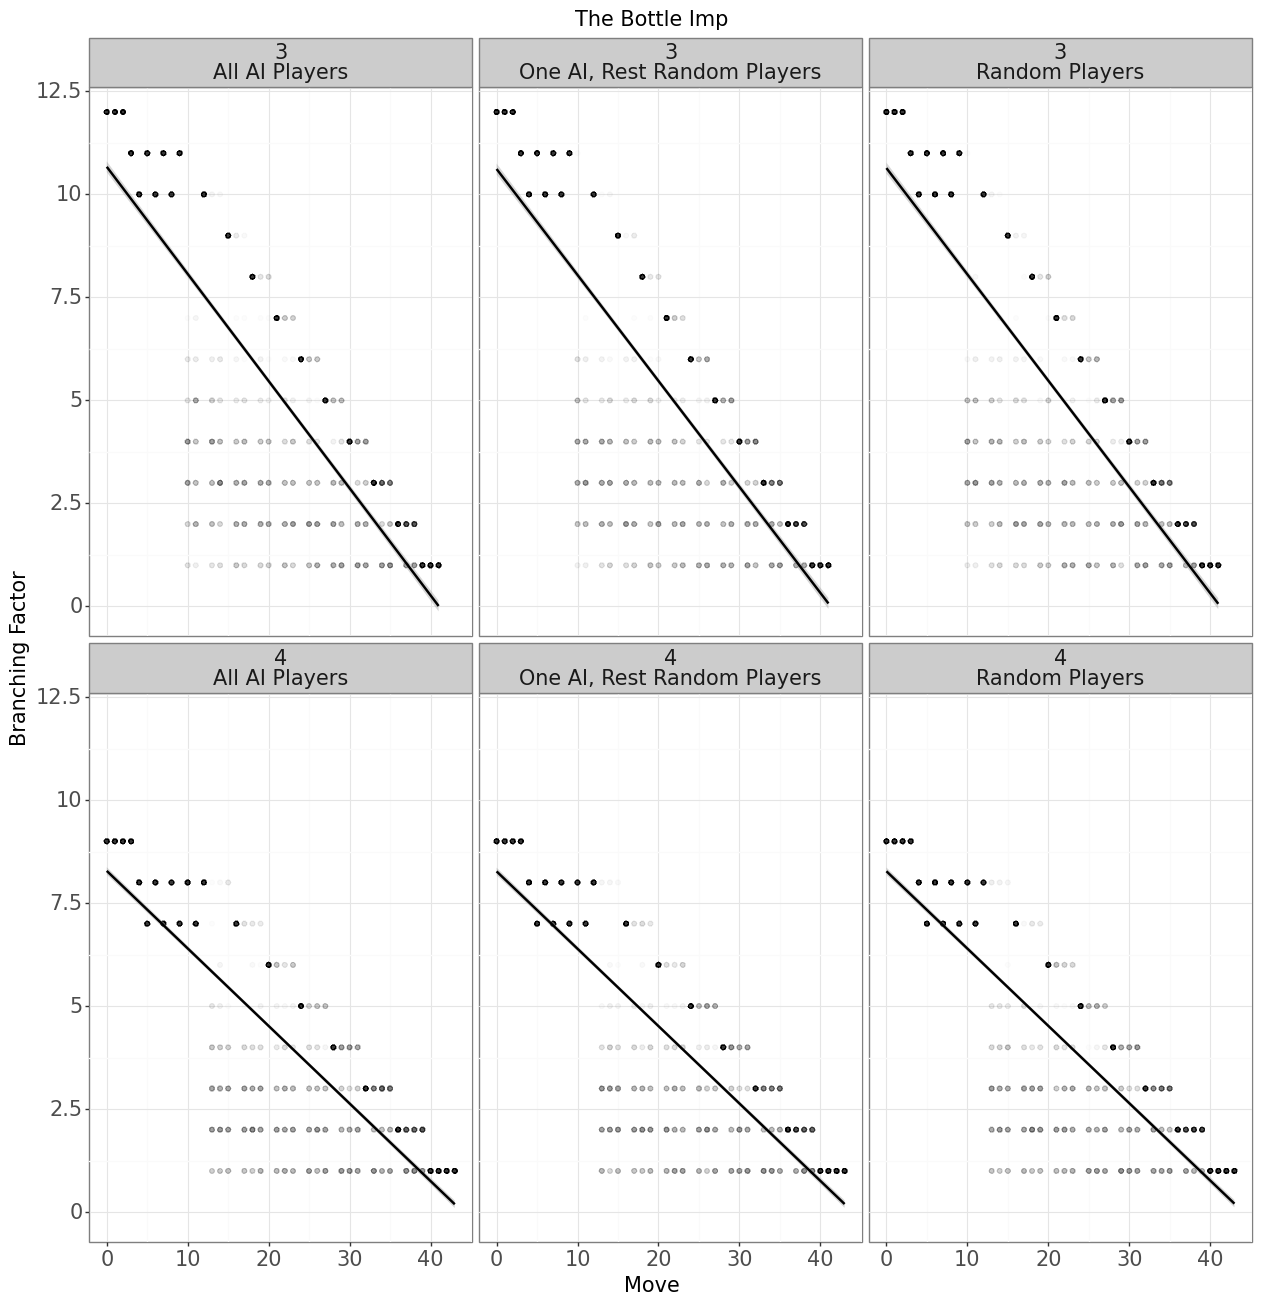

<ggplot: (8781925410184)>

In [7]:
game = "The Bottle Imp"
ggplot(choiceframe[(choiceframe["game"] == game)], aes(x="move", y="choices")) + \
geom_point(alpha= 0.01) + \
geom_smooth(method="lm") + \
facet_wrap(["numPlayers", "type"], ncol = 3) + \
theme_bw() + \
aes(ymin=0) + \
theme(figure_size=(15, 15), text=element_text(size=15)) + \
labs(x='Move', y='Branching Factor', title=game)

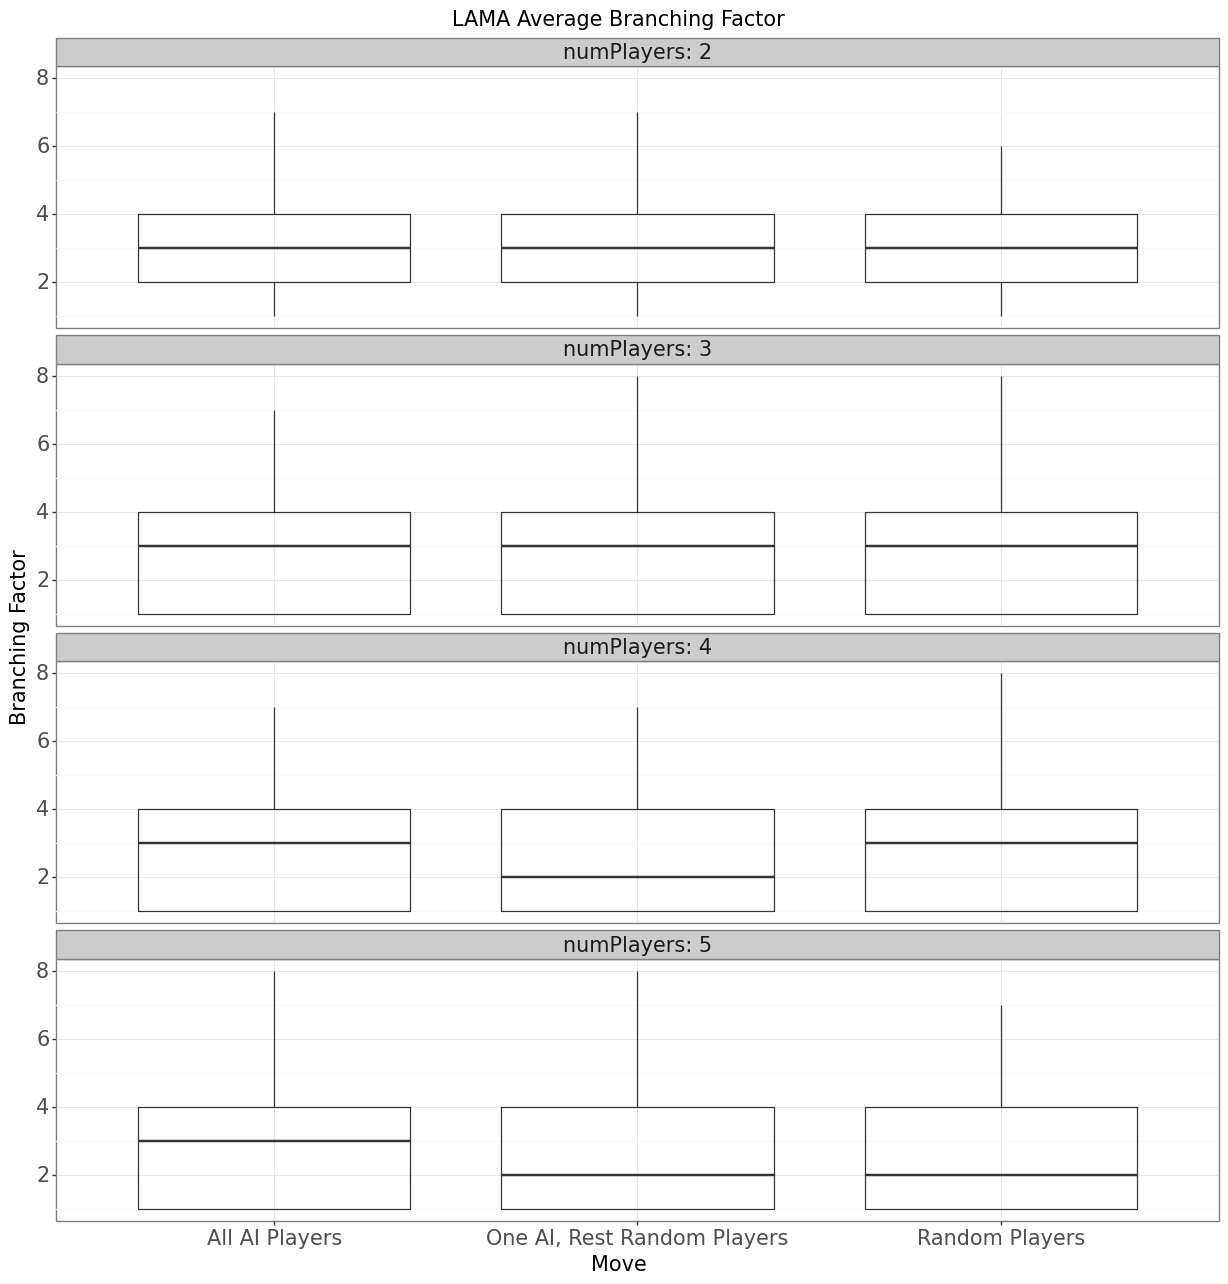

<ggplot: (8781977596233)>

In [8]:
game = "LAMA"
ggplot(choiceframe[(choiceframe["game"] == game)], aes(x="type", y="choices")) + \
geom_boxplot(alpha= 0.01) + \
facet_wrap("numPlayers", ncol = 1, labeller='label_both') + \
theme_bw() + \
aes(ymin=0) + \
theme(figure_size=(15, 15), text=element_text(size=15)) + \
labs(x='Move', y='Branching Factor', title=game + " Average Branching Factor")

## Compare two games over the total number of moves

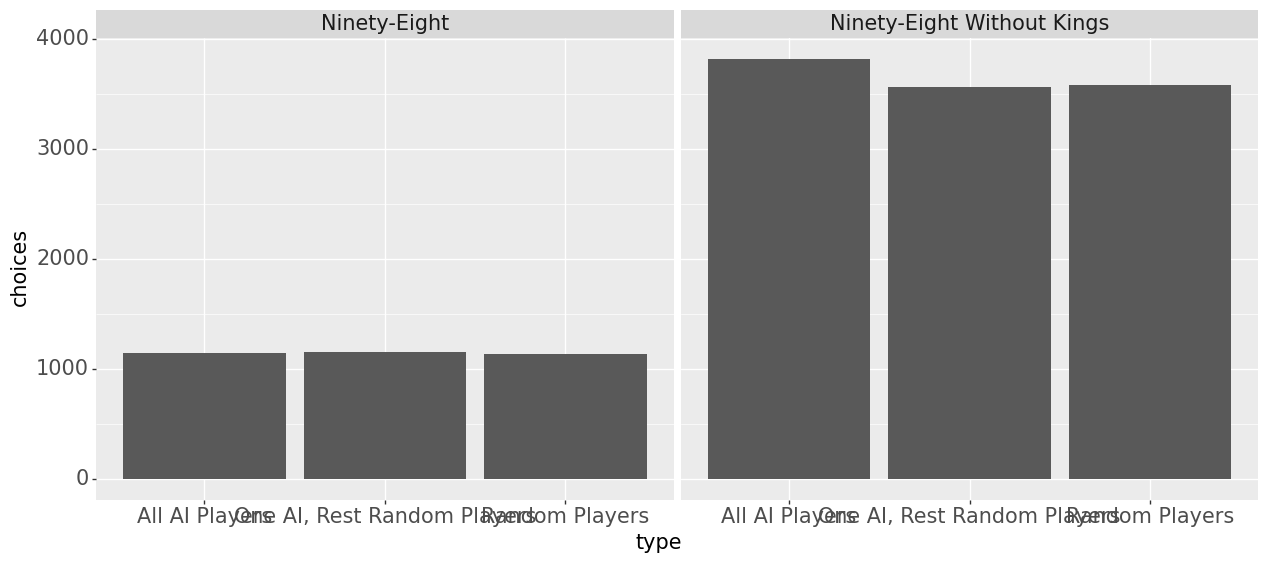

<ggplot: (8781925244284)>

In [9]:
game = "Ninety-Eight"
game2 = "Ninety-Eight Without Kings"
ggplot(choiceframe[(choiceframe["game"] == game) | (choiceframe["game"] == game2)]) + \
stat_summary(aes(x = "type", y = "choices"), 
               fun_y = len,
               geom = "bar") + \
facet_wrap("game") + \
theme(figure_size=(15, 6), text=element_text(size=15))


# Lead History 

First, we create the Dataframe for storing all of the game statistics for the lead histories, then we can use this to project multiple graphs.

The **Security** and **Drama** Heuristics are calculated as part of this process.

In [10]:
def getKey(item):
    return item[0]

suffix = {1:"st", 
       2:"nd",
       3:"rd"}

dfave = []

for record in games:
    game = record["file"]
    nump = record["player"]
    record["Drama"] = 0
    record["Security"] = 0

    type = "AllAI"
    dthresh = (1 + (nump - 2) / (nump - 1)) / 2


    ropen = open(fileprefix + game + str(nump) + ".gdl" + type + "-resultsstats.txt")
    resdata = ropen.readlines()[5 + nump:]
    ropen.close()
    ranksfull = []
    for d in resdata:
        ranksfull.append([int(x) for x in d.strip().split(",")[:-1]])
    
    fopen = open(fileprefix + game + str(nump) + ".gdl" + type + "-leadstats.txt")
    data = fopen.readlines()
    fopen.close()
    preds = [[] for i in range(nump)]
    averages = [np.zeros(101) for i in range(nump)]
    
    count2 = 0
    if (len(data) > 0):
        iteration = int(data[1][4:])
    for d in data[2:]:
        if not d[0].isdigit():

            maxlen = 0
            for p in preds:
                if len(p) > maxlen:
                    maxlen = len(p)


            ranks = [(((nump - 1) - ranksfull[i][iteration]) / (nump - 1), i) for i in range(len(preds))]
            sortedranks = sorted(ranks, key=getKey)
            winner = sortedranks[-1][1]

            #ranks = [(preds[i][-1], i) for i in range(len(preds))]
            #ranks.sort(key=getKey)
            #winner = ranks[0][1]

            px = [x / maxlen for x in range(len(preds[0]) + 1)]

            for i in range(len(preds)):
                f = interp1d(px, preds[sortedranks[i][1]] + [sortedranks[i][0]])
                xnew = np.linspace(0, 1, num=101)
                ynew = f(xnew)
                averages[i] += ynew
                for j in range(len(ynew)):
                    dfave.append([j/100, ynew[j], str(nump - i) + suffix.get(nump - i,"th"), str(sortedranks[i][1]+1) + suffix.get(sortedranks[i][1]+1, "th"), record["name"], iteration, nump, dthresh])
                
            # records Drama and Security values
            dcount = 0
            drama = 0
            for s in preds[winner]:
                if s < dthresh:
                    dcount += 1
                    drama += (dthresh - s) ** 0.5
            if dcount > 0:
                drama /= dcount
            record["Drama"] += drama / count[type]
            record["Security"] += (1 - dcount /  len(preds[winner])) / count[type]


            preds = [[] for i in range(nump)]
            count2 += 1
            iteration = int(d[4:])

        else:
            leads = [float(x) for x in d[:-2].strip().split(",")]
            for p in range(nump):
                preds[p].append(leads[p + 1])

dfave = pd.DataFrame(dfave, columns=["portion", "estimate", "rank", "position", "game", "iteration", "numPlayers", "dthreshold"])


In [11]:
dfave

portion  estimate rank position            game  iteration  \
0           0.00  0.333333  4th      2nd          Hearts          0   
1           0.01  0.385333  4th      2nd          Hearts          0   
2           0.02  0.436000  4th      2nd          Hearts          0   
3           0.03  0.470667  4th      2nd          Hearts          0   
4           0.04  0.524000  4th      2nd          Hearts          0   
...          ...       ...  ...      ...             ...        ...   
1129882     0.96  1.000000  1st      4th  The Bottle Imp         89   
1129883     0.97  1.000000  1st      4th  The Bottle Imp         89   
1129884     0.98  1.000000  1st      4th  The Bottle Imp         89   
1129885     0.99  1.000000  1st      4th  The Bottle Imp         89   
1129886     1.00  1.000000  1st      4th  The Bottle Imp         89   

         numPlayers  dthreshold  
0                 4    0.833333  
1                 4    0.833333  
2                 4    0.833333  
3                 4    0.833333  
4                 4    0.833333  
...             ...         ...  
1129882           4    0.833333  
1129883           4    0.833333  
1129884           4    0.833333  
1129885           4    0.833333  
1129886           4    0.833333  

[1129887 rows x 8 columns]

## Turn Order
A graph with facet by game to show how turn order affects final rank

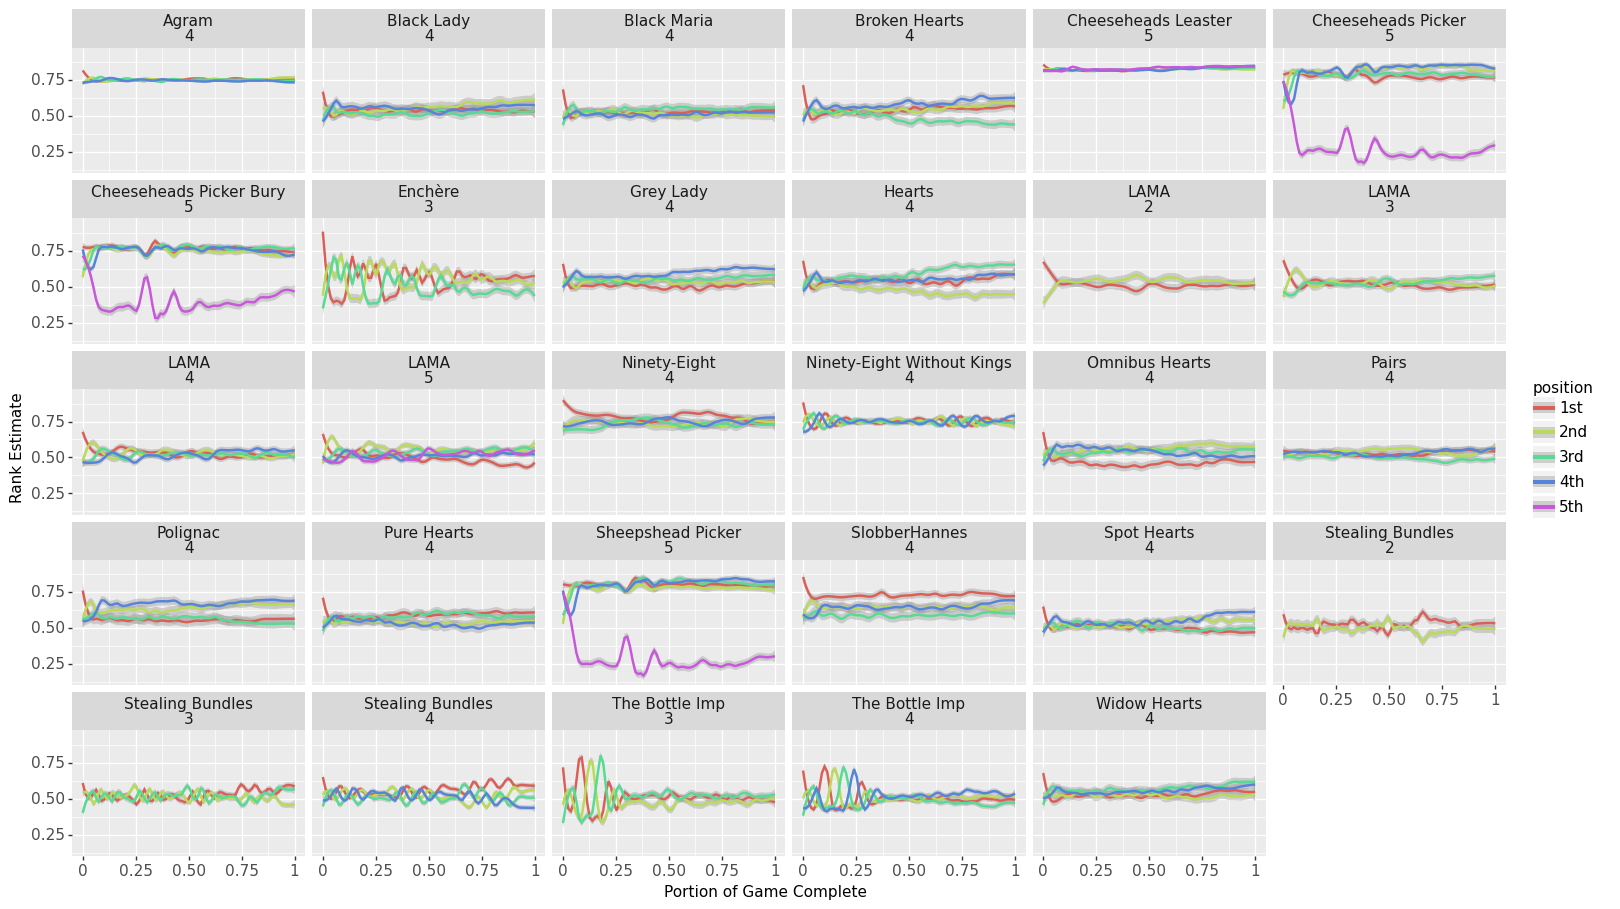

<ggplot: (8781977603913)>

In [12]:
ggplot(dfave, aes(x="portion", y="estimate", color="position")) + \
geom_smooth(method="loess", span = .1) + \
facet_wrap(["game", "numPlayers"]) + \
theme(figure_size=(18.5, 10.5), text=element_text(size=11)) + \
labs(x='Portion of Game Complete', y='Rank Estimate')

## Rank Order

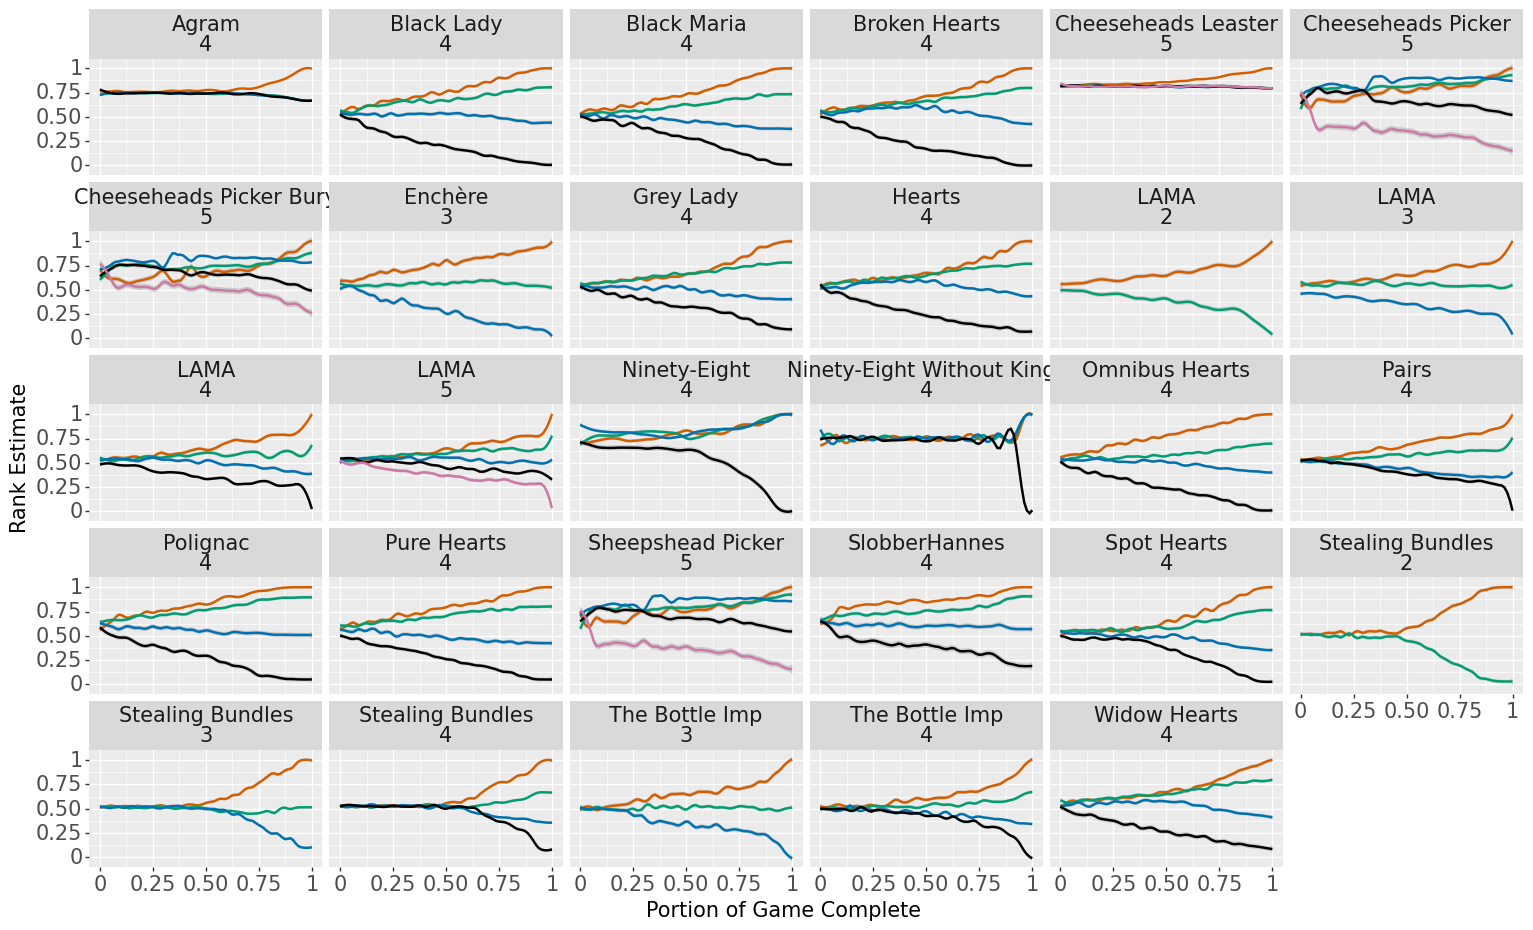

<ggplot: (8781977608331)>

In [13]:

ggplot(dfave, aes(x="portion", y="estimate", color="rank")) + \
geom_smooth(method="loess", span = .1) + \
facet_wrap(["game", "numPlayers"]) + \
theme(figure_size=(18.5, 10.5), legend_position=(.75, .2), text=element_text(size=15)) + \
labs(x='Portion of Game Complete', y='Rank Estimate') + \
scale_colour_manual(values=cbbPalette)

# Warning
These next two take a very long time to run

In [13]:
ggplot(dfave, aes(x="portion", y="estimate", color="rank")) + \
geom_smooth(method="loess", span = .3) + \
facet_wrap(["game", "numPlayers"]) + \
theme(figure_size=(18.5, 15.5), legend_position=(.8, .2)) + \
labs(x='Portion of Game Complete', y='Rank Estimate') 

KeyboardInterrupt: 

In [14]:
ggplot(dfave, aes(x="portion", y="estimate", color="game")) + \
geom_smooth(method="loess", span = .1) + \
facet_wrap(["game", "numPlayers"]) + \
theme(figure_size=(18.5, 10.5), text=element_text(size=15)) + \
labs(x='Portion of Game Complete', y='Rank Estimate') 

## Game Lead History Average
Define the game in the variable below

/Users/goadrich/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_smooth : Removed 4 rows containing missing values.


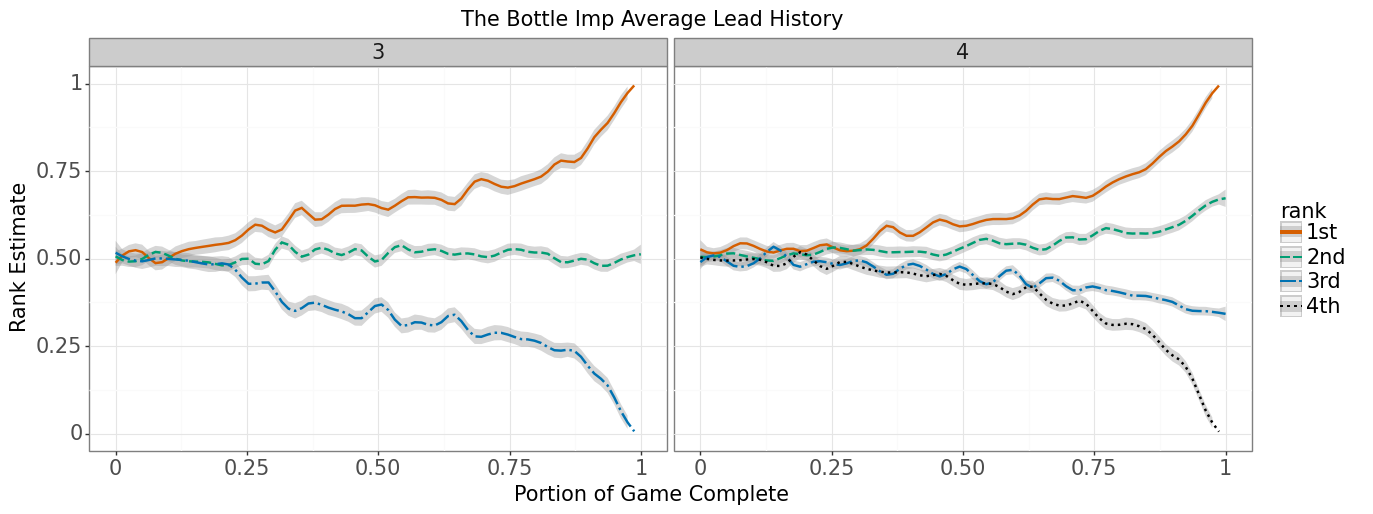

<ggplot: (8781877041390)>

In [16]:
game = "The Bottle Imp"
ggplot(dfave[(dfave["game"] == game)], 
       aes(x="portion", y="estimate", linetype="rank", color="rank")) + \
geom_smooth(method="loess", span = .1) + \
theme_bw() + \
ylim(0, 1) + \
facet_wrap("numPlayers") + \
theme(figure_size=(15, 5), text=element_text(size=15)) + \
labs(x='Portion of Game Complete', y='Rank Estimate', title=game + " Average Lead History") + \
scale_colour_manual(values=cbbPalette)

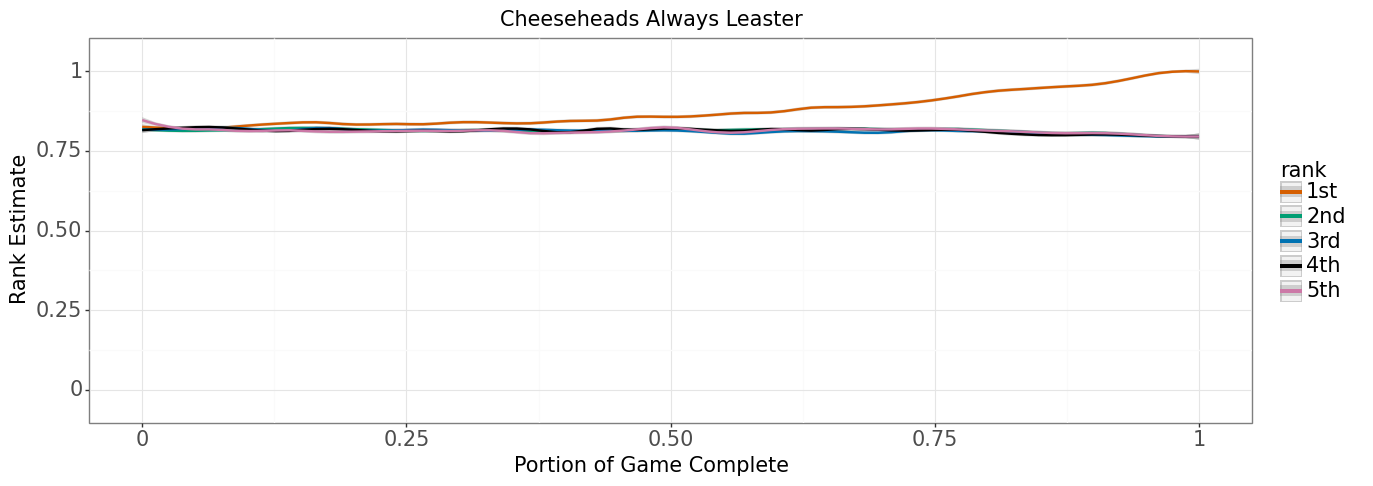

<ggplot: (8781983194245)>

In [18]:
ggplot(dfave[(dfave["game"] == "Cheeseheads Leaster")], 
       aes(x="portion", y="estimate", color="rank")) + \
geom_smooth(method="loess", span = .1) + \
theme_bw() + \
theme(figure_size=(15, 5), text=element_text(size=15)) + \
labs(x='Portion of Game Complete', y='Rank Estimate', title="Cheeseheads Always Leaster") + \
scale_colour_manual(values=cbbPalette) + \
ylim(-0.05, 1.05)

# Spread History
Gather and interpret spread statistics from file.

In [1]:
suffix = {1:"st", 
       2:"nd",
       3:"rd"}

dsave = []

for record in games:
    game = record["file"]
    nump = record["player"]

    type = "AllAI"
    dthresh = (1 + (nump - 2) / (nump - 1)) / 2

    ropen = open(fileprefix + game + str(nump) + ".gdl" + type + "-resultsstats.txt")
    resdata = ropen.readlines()[5 + nump:]
    ropen.close()
    ranksfull = []
    for d in resdata:
        ranksfull.append([int(x) for x in d.strip().split(",")[:-1]])

    fopen = open(fileprefix + game + str(nump) + ".gdl" + type + "-spreadstats.txt")
    data = fopen.readlines()
    fopen.close()
    preds = [[] for i in range(nump)]
    averages = [np.zeros(101) for i in range(nump)]

    # get all data from spread file
    count2 = 0
    iterations = []
    player_num = []
    spreads = []
    for d in data[1:]:
        x = d.strip().split(",")
        if count2 == 0:
            if (len(data) > 0):
                iteration = int(d[4:])
                iterations.append(iteration)
            count2 += 1
        elif count2 == 1:
            spreads.append([float(s) for s in x[:-1]])
            count2 += 1
        else:
            player_num.append([int(p) for p in x[:-1]])
            count2 = 0

    # print(player_num)
    # print(len(player_num))
    # print(spreads)
    # print(len(spreads))
    
    # put data in format that can be put in table
    for i in range(len(preds)):
        pass

NameError: name 'games' is not defined

## Individual Game Lead History
choose the iteration and game

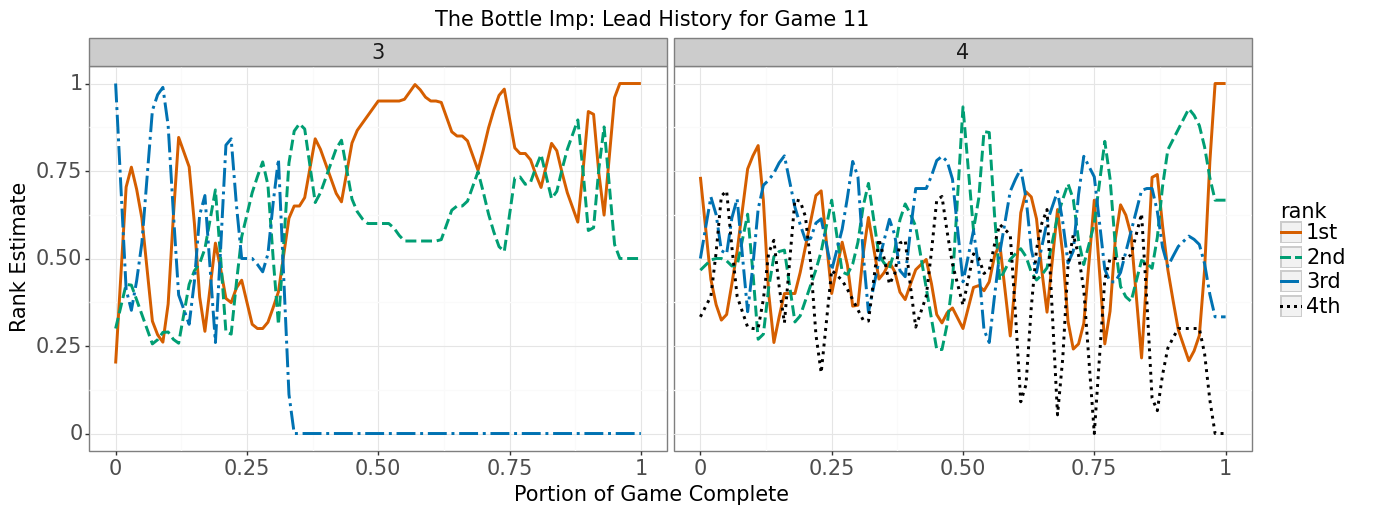

<ggplot: (8781928129018)>

In [21]:
game = "The Bottle Imp"
iter = 11
ggplot(dfave[(dfave["iteration"] == iter) & (dfave["game"] == game)], 
       aes(x="portion", y="estimate", color="rank")) + \
geom_line(aes(linetype = "rank"), size=1.2) + \
facet_wrap("numPlayers") + \
theme_bw() + \
ylim(0, 1) + \
theme(figure_size=(15, 5), text=element_text(size=15)) + \
labs(x='Portion of Game Complete', y='Rank Estimate', title=game + ": Lead History for Game " + str(iter)) + \
scale_colour_manual(values=cbbPalette)

## All Individual Lead Histories

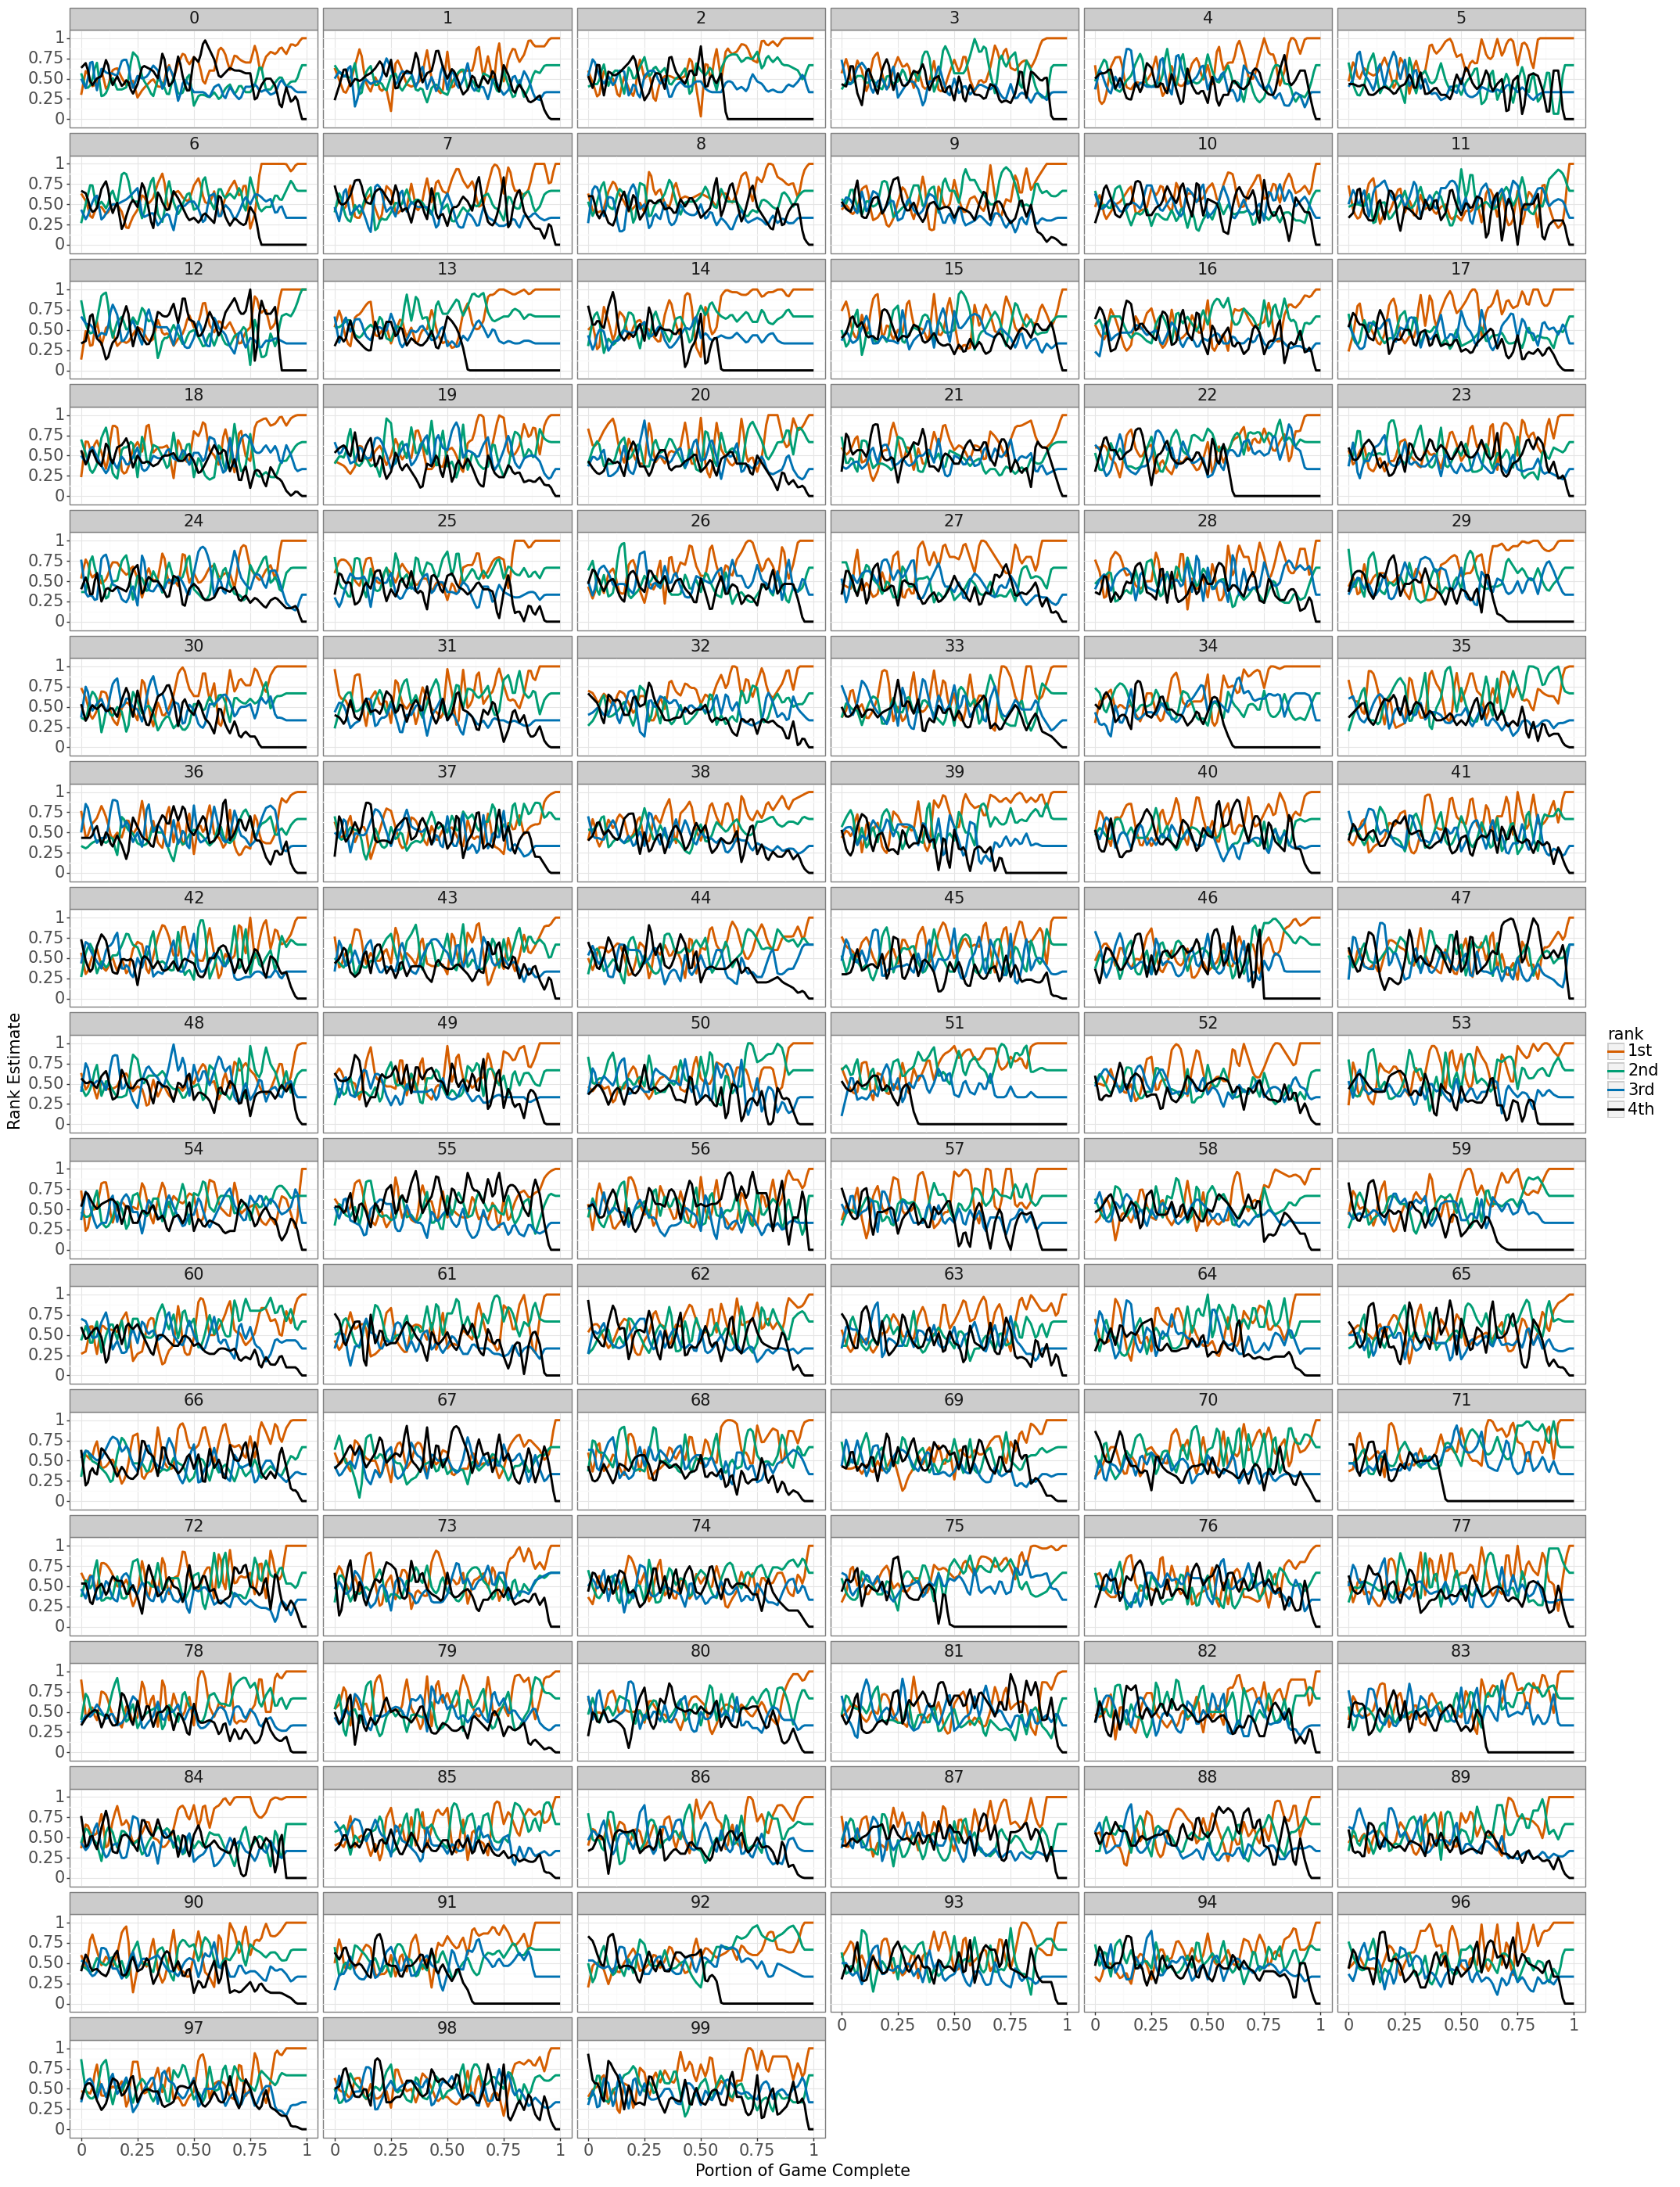

<ggplot: (8781877054660)>

In [22]:
game = "The Bottle Imp"
nump = 4
ggplot(dfave[(dfave["game"] == game) & (dfave["numPlayers"] == nump)], 
   aes(x="portion", y="estimate", color="rank")) + \
geom_line(size=1.2) + \
facet_wrap("iteration", ncol = 6) + \
theme_bw() + \
theme(figure_size=(25, 35), text=element_text(size=15)) + \
labs(x='Portion of Game Complete', y='Rank Estimate') + \
scale_colour_manual(values=cbbPalette) + \
ylim(-0.05, 1.05)

# Calculating other heuristics

In [23]:
for record in games:
    game = record["file"]
    nump = record["player"]

    fopen = open(fileprefix + game + str(nump) + ".gdl-heuristics.txt")
    data = fopen.readlines()
    fopen.close()
    names = []
    values = []
    for line in data:
        h = line.strip().split("\t")
        names.append(h[0])
        values.append(float(h[1]))
        if (names[-1] == "MeaningfulMoves"):
            record["Spread"] = values[-1]
        if (names[-1] == "Fairness"):
            record["Fairness"] = values[-1]

    fopen = open(fileprefix + game + str(nump) + ".gdl" + "RndandAI" + "-resultsstats.txt")
    data = fopen.readlines()
    fopen.close()

    ranks = []
    for i in range(nump):
        scores = [int(x) for x in data[4 + i][:-2].strip().split(",")]
        ranks.append([int(x) for x in data[4 + nump + 1 + i][:-2].strip().split(",")])

    wsize = 1 - 1 / nump
    record["Order"] = ((len([x for x in ranks[0] if x == 0]) / len(ranks[0])) - (1 / nump)) / wsize

    

In [24]:
gdf = pd.DataFrame(games)
gdf["name_player"] = gdf[["name", "player"]].astype(str).apply(':'.join, axis=1)
gdf

file                        name  player  Convergence  \
0                 Hearts                      Hearts       4     0.537303   
1           HeartsNoMoon               Broken Hearts       4     0.536646   
2              BlackLady                  Black Lady       4     0.551042   
3             PureHearts                 Pure Hearts       4     0.549503   
4             BlackMaria                 Black Maria       4     0.549286   
5          HeartsOmnibus              Omnibus Hearts       4     0.538809   
6               Hearts7Q                   Grey Lady       4     0.536834   
7            WidowHearts                Widow Hearts       4     0.539153   
8             SpotHearts                 Spot Hearts       4     0.537658   
9               Polignac                    Polignac       4     0.556503   
10         SlobberHannes               SlobberHannes       4     0.554622   
11     CheeseheadsPicker          Cheeseheads Picker       5     0.528264   
12    CheeseheadsLeaster         Cheeseheads Leaster       5     0.551407   
13      SheepsheadPicker           Sheepshead Picker       5     0.530004   
14  CheeseheadPickerBury     Cheeseheads Picker Bury       5     0.529060   
15               Enchere                     Enchère       3     0.665637   
16                 Agram                       Agram       4     0.561441   
17                 Pairs                       Pairs       4     0.500000   
18                  LAMA                        LAMA       2     0.711457   
19                  LAMA                        LAMA       3     0.636146   
20                  LAMA                        LAMA       4     0.576407   
21                  LAMA                        LAMA       5     0.567143   
22           NinetyEight                Ninety-Eight       4     0.500000   
23     NinetyEightNoKing  Ninety-Eight Without Kings       4     0.500751   
24       StealingBundles            Stealing Bundles       2     0.506513   
25       StealingBundles            Stealing Bundles       3     0.509770   
26       StealingBundles            Stealing Bundles       4     0.513026   
27             BottleImp              The Bottle Imp       3     0.628574   
28             BottleImp              The Bottle Imp       4     0.593863   

       Drama  Security  Fairness    Spread     Order  \
0   0.443131  0.340769  0.940000  0.133821  0.386667   
1   0.422512  0.347692  0.986667  0.136569  0.466667   
2   0.414155  0.444038  0.986667  0.133087  0.373333   
3   0.388048  0.456731  0.948889  0.127195  0.426667   
4   0.435921  0.407500  0.913333  0.132887  0.293333   
5   0.438284  0.474615  0.946667  0.135815  0.386667   
6   0.452380  0.355000  0.860000  0.139426  0.413333   
7   0.444414  0.336042  0.940000  0.136372  0.413333   
8   0.477606  0.314038  1.000000  0.149190  0.520000   
9   0.362280  0.551563  0.933333  0.123133  0.480000   
10  0.305344  0.600625  0.966667  0.123725  0.693333   
11  0.447513  0.522944  0.862500  0.101400  0.637500   
12  0.239821  0.479333  0.950000  0.036146  0.237500   
13  0.455868  0.514222  0.911458  0.104718  0.650000   
14  0.495954  0.392291  0.892708  0.102543  0.525000   
15  0.502350  0.630556  0.990000  0.212396  0.355000   
16  0.267269  0.260833  0.680000  0.050822  0.253333   
17  0.418158  0.221969  0.946667  0.207923  0.586667   
18  0.384051  0.726447  0.960000  0.239527  0.540000   
19  0.483478  0.439850  0.990000  0.193335  0.565000   
20  0.469743  0.238690  0.800000  0.176914  0.480000   
21  0.527354  0.192370  0.981250  0.169752  0.450000   
22  0.391937  0.500277  0.964444  0.383311  0.906667   
23  0.378751  0.348462  0.977778  0.367524  0.893333   
24  0.415194  0.758125  0.940000  0.155514  0.380000   
25  0.464862  0.326042  0.840000  0.144789  0.160000   
26  0.501693  0.196042  0.986667  0.136917  0.280000   
27  0.521888  0.440714  0.982500  0.189500  0.655000   
28  0.504016  0.220000  0.900000  0.185400  0.560000   

                     name_pl

# Individual Game Heuristics

In [25]:
gdfmelt = pd.melt(gdf, id_vars=['name', 'player'], value_vars=['Convergence', 'Drama', 'Security', 'Fairness', 'Spread', 'Order'],
        var_name='heuristic', value_name='value')
gdfmelt

name  player    heuristic     value
0              Hearts       4  Convergence  0.537303
1       Broken Hearts       4  Convergence  0.536646
2          Black Lady       4  Convergence  0.551042
3         Pure Hearts       4  Convergence  0.549503
4         Black Maria       4  Convergence  0.549286
..                ...     ...          ...       ...
169  Stealing Bundles       2        Order  0.380000
170  Stealing Bundles       3        Order  0.160000
171  Stealing Bundles       4        Order  0.280000
172    The Bottle Imp       3        Order  0.655000
173    The Bottle Imp       4        Order  0.560000

[174 rows x 4 columns]

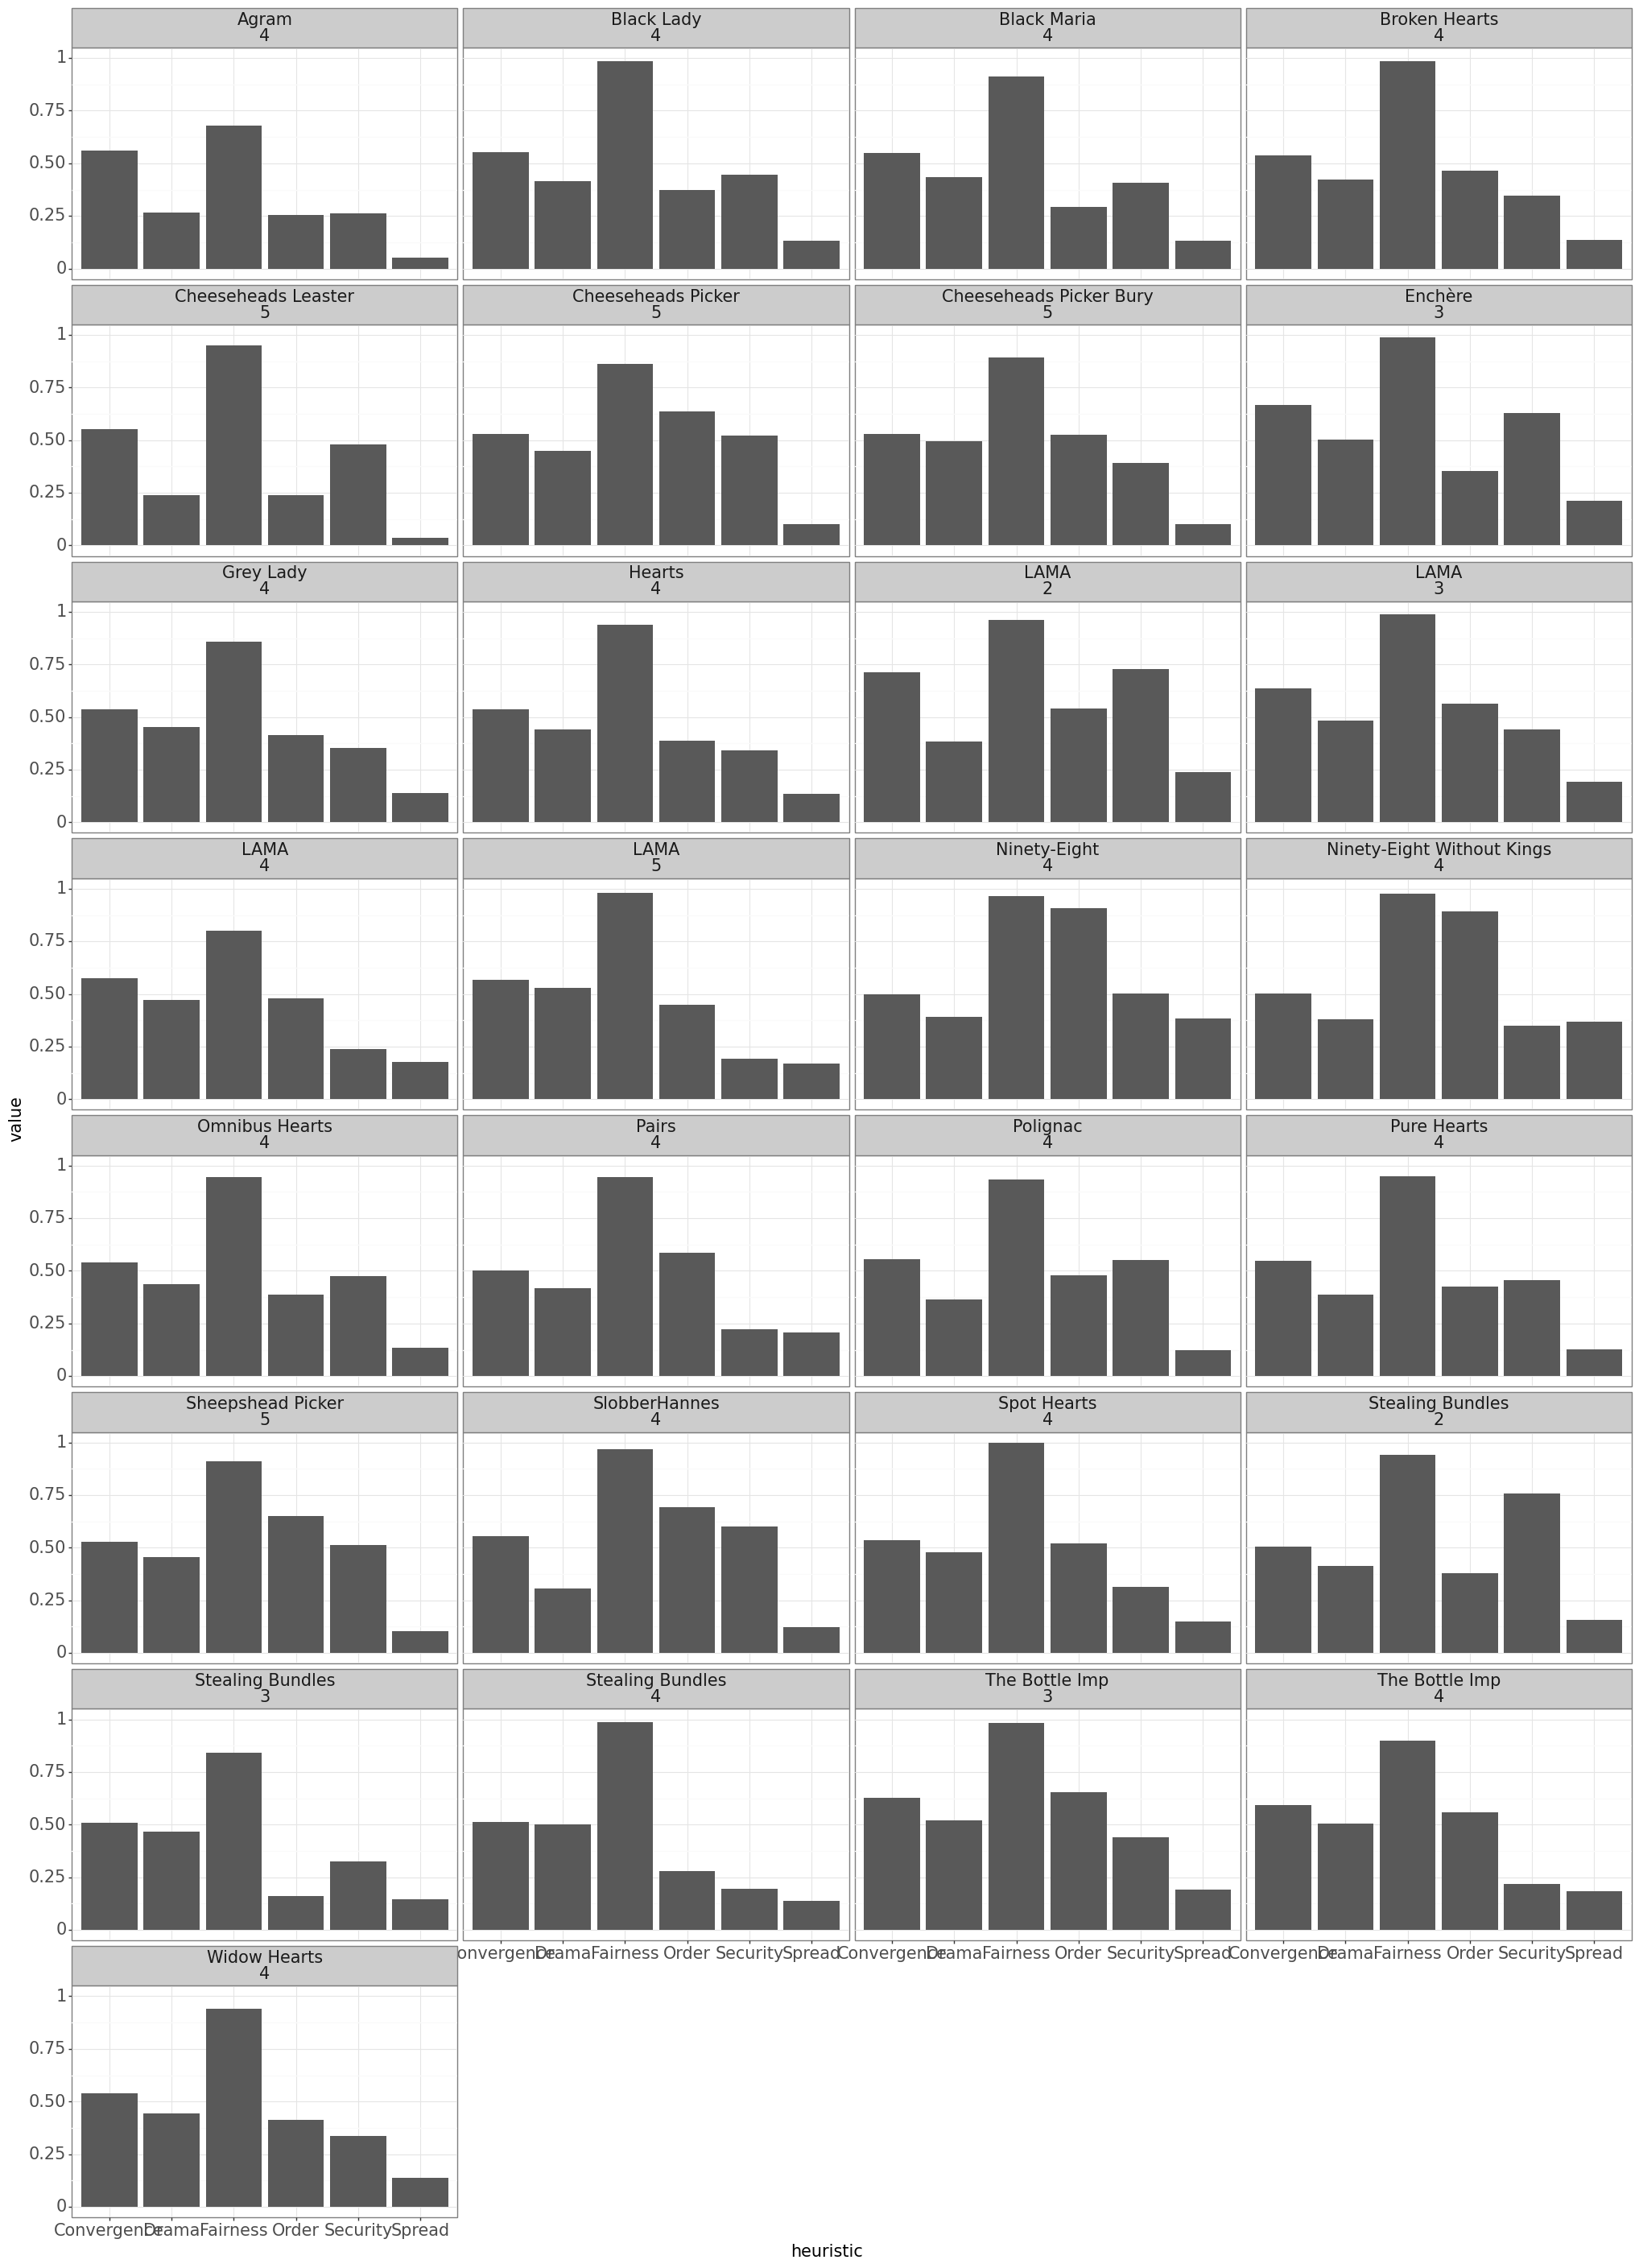

<ggplot: (8781925748529)>

In [26]:
ggplot(gdfmelt, aes("heuristic", "value")) + \
facet_wrap(["name", "player"], ncol = 4) + \
theme_bw() + \
theme(figure_size=(25, 35), text=element_text(size=15)) + \
geom_col()

# 1D Heuristic Comparisons

/Users/goadrich/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_segment : Removed 1 rows containing missing values.
/Users/goadrich/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_segment : Removed 1 rows containing missing values.
/Users/goadrich/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_segment : Removed 1 rows containing missing values.


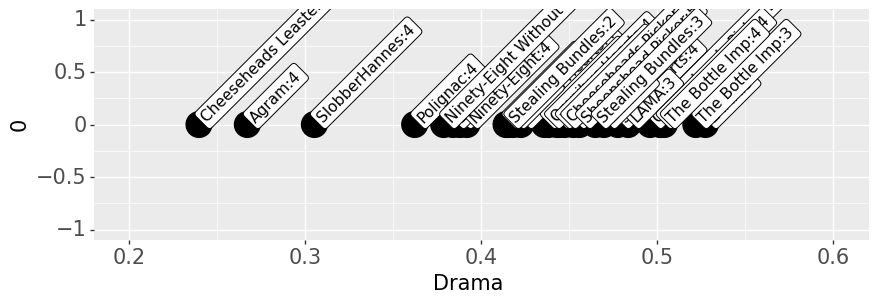

<ggplot: (8781978851157)>

In [27]:
ggplot(gdf, aes(x="Drama", y=0)) + \
  geom_point(size = 10)  + \
  geom_label(aes(label = "name_player", angle=45), ha="left", va="bottom") + \
  annotate("segment",x=0,xend=1, y=0, yend=0, size=2) + \
  annotate("segment",x=1,xend=1, y=-0.2,yend=0.2, size=2) + \
  annotate("segment",x=0,xend=0, y=-0.2,yend=0.2, size=2) + \
  scale_x_continuous(limits = [0.2,0.6]) + \
  scale_y_continuous(limits = [-1,1]) + \
  theme(figure_size=(10, 3), text=element_text(size=15))

# 2D Heuristic Comparisons

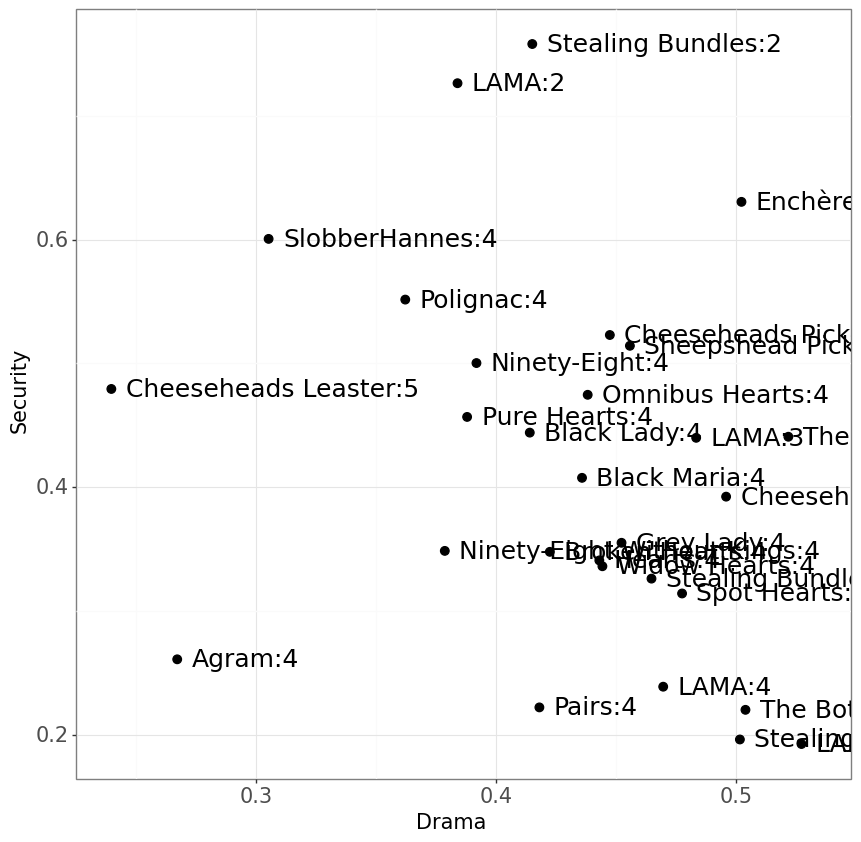

<ggplot: (8781979190230)>

In [28]:
ggplot(gdf, aes("Drama", "Security", label="name_player")) + \
geom_text(size=18, nudge_x = 0.006, ha = "left") + \
geom_point(size=3) + \
theme_bw() + \
theme(figure_size=(10, 10), text=element_text(size=15))

# PCA Analysis and K-means Clustering

In [29]:
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame(gdf[["Convergence", "Drama", "Security", "Fairness", "Order"]])
x = MinMaxScaler().fit_transform(df.values)
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, init="random",
           n_init = 10, max_iter=300,
           tol=1e-04, random_state=0)
result = km.fit(x)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
pcadf = pd.DataFrame(data= principal_components,
                       columns=["PCA 1", "PCA 2"])
pcadf["cluster"] = pd.Series(result.labels_).astype("str")
pcadf["name_player"]= gdf["name_player"]

pcadf

PCA 1     PCA 2 cluster                   name_player
0  -0.171751 -0.023493       2                      Hearts:4
1  -0.071967 -0.062157       2               Broken Hearts:4
2   0.058932  0.023480       0                  Black Lady:4
3   0.071472  0.131534       0                 Pure Hearts:4
4  -0.114551  0.086834       2                 Black Maria:4
5   0.025623  0.031460       0              Omnibus Hearts:4
6  -0.231244  0.057569       2                   Grey Lady:4
7  -0.165401 -0.041707       2                Widow Hearts:4
8  -0.117849 -0.267343       2                 Spot Hearts:4
9   0.236510  0.231762       0                    Polignac:4
10  0.452001  0.272927       0               SlobberHannes:4
11  0.073997  0.048089       0          Cheeseheads Picker:5
12  0.131084  0.620054       0         Cheeseheads Leaster:5
13  0.115119 -0.053130       0           Sheepshead Picker:5
14 -0.147070 -0.131245       2     Cheeseheads Picker Bury:5
15  0.479151 -0.250436       1                     Enchère:3
16 -0.440028  0.819241       2                       Agram:4
17 -0.309631 -0.058802       2                       Pairs:4
18  0.815611  0.030866       1                        LAMA:2
19  0.250394 -0.332903       1                        LAMA:3
20 -0.362125 -0.017371       2                        LAMA:4
21 -0.305790 -0.423649       2                        LAMA:5
22  0.230084 -0.036110       0                Ninety-Eight:4
23  0.039463 -0.073361       0  Ninety-Eight Without Kings:4
24  0.358870  0.248430       0            Stealing Bundles:2
25 -0.448292  0.171261       2            Stealing Bundles:3
26 -0.448416 -0.237348       2            Stealing Bundles:4
27  0.238495 -0.457112       1              The Bottle Imp:3
28 -0.242693 -0.307339       2              The Bottle Imp:4

<Figure size 432x288 with 0 Axes>

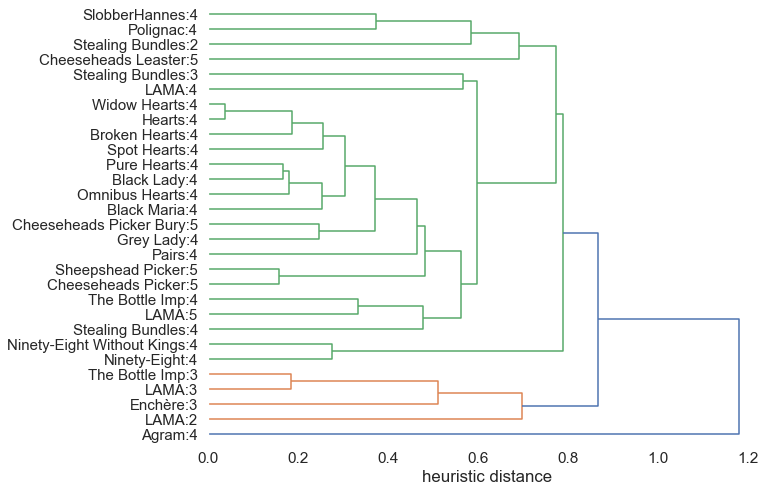

In [30]:
from scipy.cluster import hierarchy
c = hierarchy.linkage(np.array(x), 'average')

plt.figure()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
dn = hierarchy.dendrogram(c, labels = list(gdf["name_player"]), ax=ax, orientation = 'right')
ax.tick_params(axis='y', which='major', labelsize=15)
plt.xlabel("heuristic distance")
ax.set_facecolor((1, 1, 1))
plt.show()

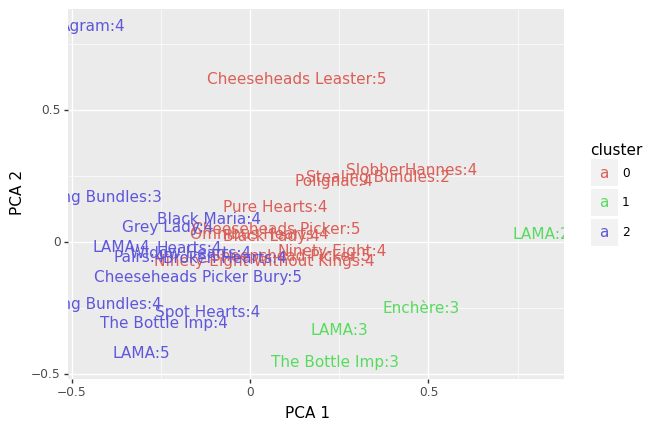

<ggplot: (8781979135516)>

In [31]:
ggplot(pcadf, aes(x="PCA 1", y="PCA 2", color="cluster")) + \
geom_text(aes(label="name_player"))

# Heuristic Equation Demo Graphs

(0.0, 1.0)

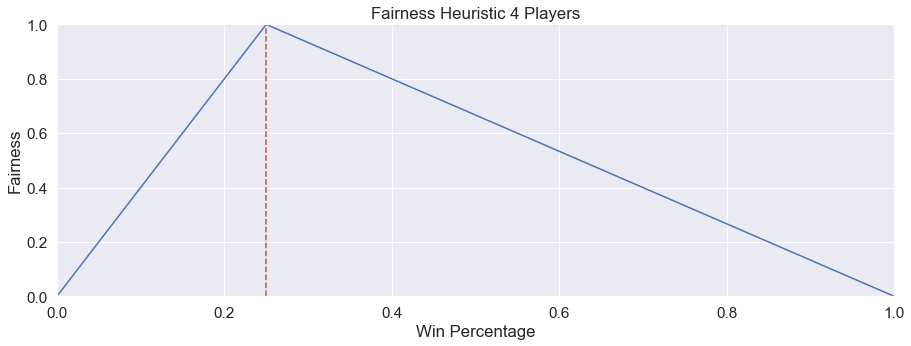

In [14]:
xs = [0, .25, 1]
ys = [0, 1, 0]
ax = plt.figure(figsize=(15,5)).gca()
plt.plot(xs, ys)
plt.title("Fairness Heuristic 4 Players")
plt.ylabel("Fairness")
plt.xlabel("Win Percentage")
plt.axvline(x=0.25, color="r", ls="dashed")
plt.ylim(0, 1)
plt.xlim(0, 1)

(1.0, 6.5)

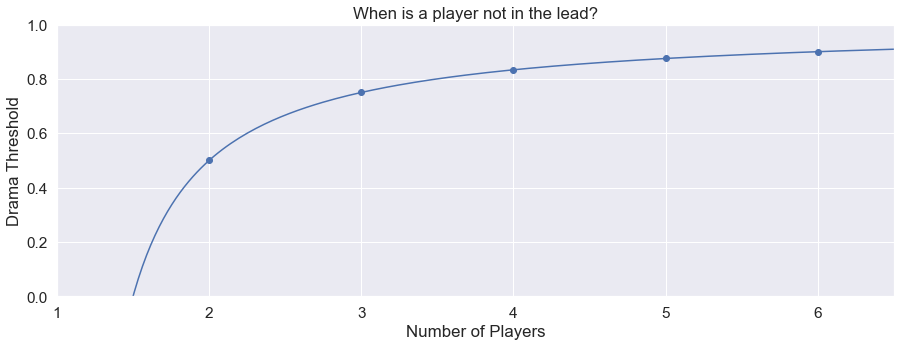

In [15]:
xs = np.linspace(1.01, 6.5, 200)
ys = [(1 + (x - 2) / (x - 1)) / 2 for x in xs]
xss = np.arange(2, 7)
yss = [(1 + (x - 2) / (x - 1)) / 2 for x in xss]
ax = plt.figure(figsize=(15,5)).gca()
plt.plot(xs, ys)
plt.scatter(xss, yss)
plt.title("When is a player not in the lead?")
plt.ylabel("Drama Threshold")
plt.xlabel("Number of Players")
plt.ylim(0, 1)
plt.xlim(1, 6.5)

Text(0.5, 0, 'Slope')

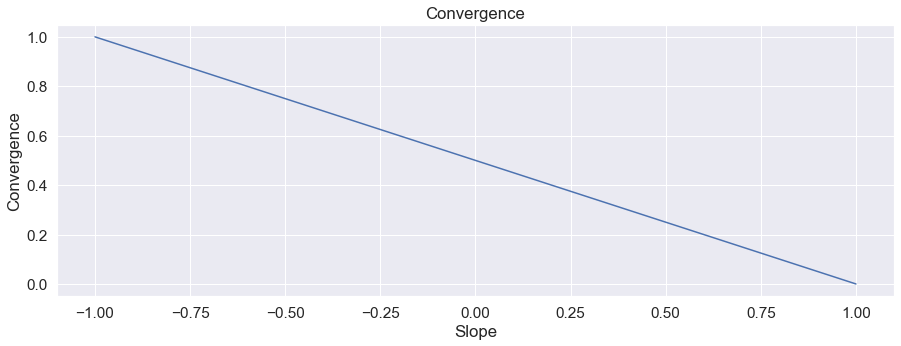

In [16]:
xs = np.linspace(-1, 1, 200)
ys = [(1 - (x / 2 + 0.5)) for x in xs]
ax = plt.figure(figsize=(15,5)).gca()
plt.plot(xs, ys)
plt.title("Convergence")
plt.ylabel("Convergence")
plt.xlabel("Slope")


# Still Busted Graphs
Need to translate into data frames and ggplot

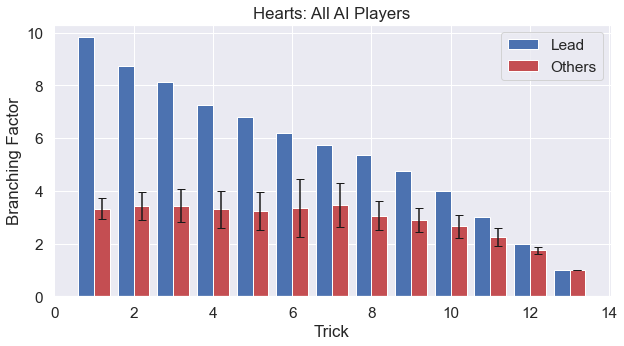

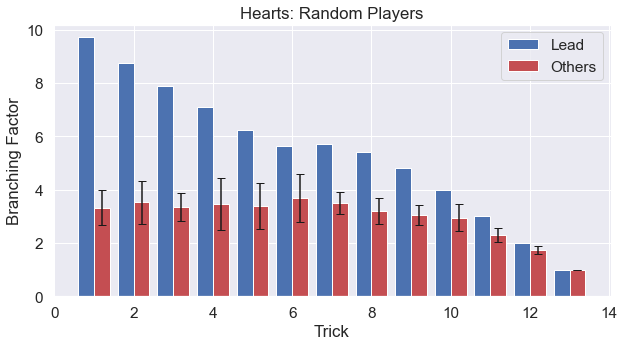

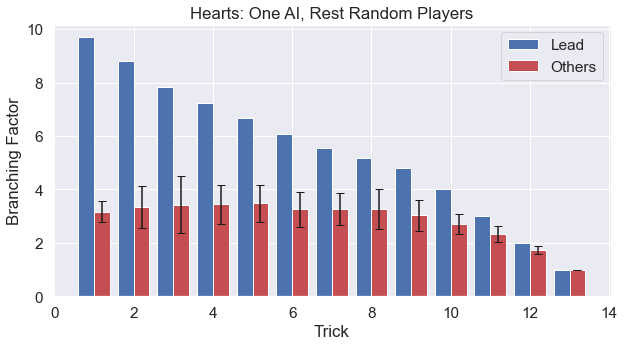

In [ ]:
w = 0.4
tricks = 13
epoch = 10
for type in count.keys():
    if tricktaking:
        fopen = open(fileprefix + game + str(4) + ".gdl" + type + "-choicestats.txt")
        data = fopen.readlines()
        fopen.close()
        nump = 4
        lead = np.zeros(tricks)
        follow = np.zeros(tricks)
        followerr = np.zeros(tricks)
        followall = []
        for i in range(tricks):
            followall.append([])
        for i in range(2, len(data[1:302]), 3):
            choices = [int(x) for x in data[i][:-2].strip().split(",")]
            for j in range(len(choices)):
                if (j % nump == 0):
                    lead[j // nump] += choices[j] / count[type]
                else:
                    follow[j // nump] += choices[j] / ((nump - 1) * count[type])
                    followall[j // nump].append(choices[j])
        for i in range(tricks):
            vals = []
            for j in range(epoch):
                x = sum(followall[i][epoch*j:epoch*(j+1)]) / (count[type]/epoch)
                vals.append(x)
            followerr[i] = np.std(vals)
        ax = plt.figure(figsize=(10,5)).gca()
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.bar([x - w/2 for x in range(1, len(lead)+1)], lead, width=w)
        plt.bar([x + w/2 for x in range(1, len(follow) + 1)], follow, width=w, color="r")
        plt.errorbar([x + w/2 for x in range(1, len(follow) + 1)], follow, yerr=followerr, fmt='none', capsize=4, color="k")
        plt.xlabel("Trick")
        plt.ylabel("Branching Factor")
        plt.legend(["Lead", "Others"])
        plt.title(game + ": " + typename[type])
    #plt.ylim([0, 11])
    #plt.plot([0.8, 12.8], [13, 1], c="k")
    #plt.plot([0.8, 12.8], [9.5, -3.5], c="g")

In [ ]:
for type in count:
    fopen = open(fileprefix + game + str(4) + ".gdl" + type + "-choicestats.txt")
    data = fopen.readlines()
    fopen.close()
    nump = 4
    everychoice = np.zeros(tricks * nump)
    for i in range(2, len(data[1:302]), 3):
        choices = [int(x) for x in data[i][:-2].strip().split(",")]
        slope, intercept, r_value, p_value, std_error = st.linregress(range(1, len(choices) + 1), choices)
        for j in range(len(choices)):
            everychoice[j] += choices[j] / count[type]

    ax = plt.figure(figsize=(10,5)).gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.bar(range(1, len(everychoice) + 1), everychoice, width=w*2, color="g")
    interps = np.linspace(0, len(everychoice) + 1, 200)
    plt.plot(interps, intercept + slope * interps)
    plt.xlabel("Move")
    plt.ylabel("Branching Factor")
    plt.title(game + ": " + typename[type])

NameError: name 'tricks' is not defined

In [106]:
### type = "RndandAI"
w = 0.4
fpw = []
fpwerr = []
nl = []
nlerr = []
for nump in range(minP, maxP):
    fopen = open("../CardStockXam/bin/Release/games/" + game + str(nump) + ".gdl" + type + "-resultsstats.txt")
    data = fopen.readlines()
    fopen.close()
    score = []
    rank = []
    ranks = []
    allrank = []
    for i in range(nump):
        scores = [int(x) for x in data[4 + i][:-2].strip().split(",")]
        score.append(sum(scores) / count[type])
        ranks.append([int(x) for x in data[4 + nump + 1 + i][:-2].strip().split(",")])
        allrank.extend(ranks[i])
        rank.append(sum(ranks[i]) / count[type])
    maxr = np.max(allrank)
    fpw.append(len([x for x in ranks[0] if x == 0]) / count[type])
    nl.append(len([x for x in ranks[0] if x != maxr]) / count[type])

    vals = []
    v2 = []
    for j in range(epoch):
        x = len([x for x in ranks[0][epoch*j:epoch*(j+1)] if x == 0]) / (count[type]/epoch)
        vals.append(x)
        y = len([x for x in ranks[0][epoch*j:epoch*(j+1)] if x != maxr]) / (count[type]/epoch)
        v2.append(y)
    fpwerr.append(np.std(vals))
    nlerr.append(np.std(v2))

expected = [1 / x for x in range(2, len(fpw) + 2)]
ax = plt.figure(figsize=(10,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(0, 1)
plt.bar([x - w/2 for x in range(2, len(fpw) + 2)], fpw, width=w)
plt.bar([x + w/2 for x in range(2, len(fpw) + 2)], expected, width=w, color="r")
plt.errorbar([x - w/2 for x in range(2, len(fpw) + 2)], fpw, yerr=fpwerr, fmt='none', capsize=4, color="k")
plt.xlabel("Number of Players")
plt.ylabel("Win Probability")
plt.legend(["AI", "Random"], loc=1)
plt.title(game + " AI Win Rate")

expected = [(x - 1) / x for x in range(2, len(fpw) + 2)]
ax = plt.figure(figsize=(10,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(0, 1.1)
plt.bar([x - w/2 for x in range(2, len(fpw) + 2)], nl, width=w)
plt.bar([x + w/2 for x in range(2, len(fpw) + 2)], expected, width=w, color="r")
plt.errorbar([x - w/2 for x in range(2, len(fpw) + 2)], nl, yerr=nlerr, fmt='none', capsize=4, color="k")
plt.xlabel("Number of Players")
plt.ylabel("Nonloss Probability")
plt.title(game + " AI Nonloss Rate")
plt.legend(["AI", "Random"])

FileNotFoundError: [Errno 2] No such file or directory: '../CardStockXam/bin/Release/games/Pairs4.gdlAllAI-resultsstats.txt'

0.3866666666666667


ValueError: x and y must have same first dimension, but have shapes (3,) and (1,)

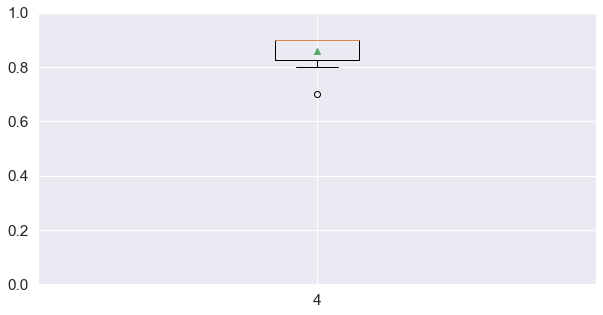

In [8]:
type = "RndandAI"
game = "Hearts"
w = 0.4
fpw = []
fpwerr = []
nl = []
nlerr = []
vals2 = []
wvals = []
for nump in range(minP, maxP):
    fopen = open("../CardStockXam/bin/Release3/games/" + game + str(nump) + ".gdl" + type + "-resultsstats.txt")
    data = fopen.readlines()
    fopen.close()
    score = []
    rank = []
    ranks = []
    allrank = []
    for i in range(nump):
        scores = [int(x) for x in data[4 + i][:-2].strip().split(",")]
        score.append(sum(scores) / count[type])
        ranks.append([int(x) for x in data[4 + nump + 1 + i][:-2].strip().split(",")])
        allrank.extend(ranks[i])
        rank.append(sum(ranks[i]) / count[type])
    maxr = np.max(allrank)
    fpw.append(len([x for x in ranks[0] if x == 0]) / count[type])
    nl.append(len([x for x in ranks[0] if x != maxr]) / count[type])

    vals = []
    v2 = []
    for j in range(epoch):
        x = len([x for x in ranks[0][epoch*j:epoch*(j+1)] if x == 0]) / (count[type]/epoch)
        vals.append(x)
        y = len([x for x in ranks[0][epoch*j:epoch*(j+1)] if x != maxr]) / (count[type]/epoch)
        v2.append(y)
    fpwerr.append(np.std(vals))
    nlerr.append(np.std(v2))
    wvals.append(vals)
    vals2.append(v2)
    wsize = 1 - 1 / nump
    print(((sum(vals) / len(vals)) - (1 / nump)) / wsize)
    if nump == 4:
        heuristics["Order"] = ((sum(vals) / len(vals)) - (1 / nump)) / wsize

ax = plt.figure(figsize=(10,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(0, 1)
plt.boxplot(vals2, labels=range(minP, maxP), showmeans=True)
plt.plot(range(1, maxP - 1), [(x - 1) / x for x in range(minP, len(fpw) + (minP))])
plt.xlabel("Number of Players")
plt.ylabel("Nonloss Probability")
plt.title(game + " AI Nonloss Rate")

ax = plt.figure(figsize=(10,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(0, 1)
plt.boxplot(wvals, labels=range(minP, maxP), showmeans=True)
plt.plot(range(1, (maxP - 1)) , [1 / x for x in range(minP, len(fpw) + (minP))])
plt.xlabel("Number of Players")
plt.ylabel("Win Probability")
plt.title(game + " AI Win Rate")

5.9799999999999995
10.489999999999995
18.17000000000001
23.890000000000008
32.78
7.340000000000002
13.029999999999989
19.890000000000004
25.490000000000002
33.66000000000001
10.680000000000003
15.570000000000006
23.399999999999995
28.919999999999998
34.03


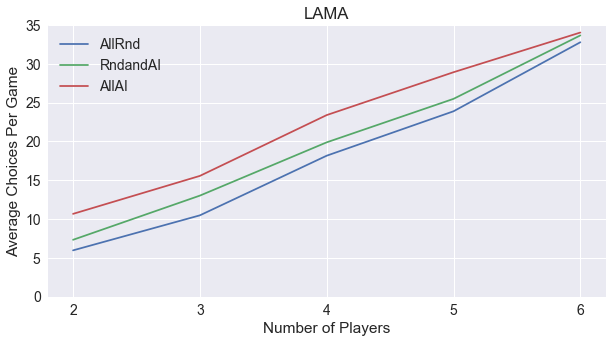

In [96]:
game = "LAMA"
w = 0.3
plt.figure(figsize=(10,5))
avechoices = {}
ac = -1
for type in ["AllRnd", "RndandAI", "AllAI"]:
    avechoices[type] = []
    for nump in range(minP, maxP):
        fopen = open(fileprefix + game + str(nump) + ".gdl" + type + "-choicestats.txt")
        data = fopen.readlines()
        fopen.close()
        ave = 0
        for i in range(2, len(data[1:302]), 3):
            choices = [int(x) for x in data[i][:-2].strip().split(",")]
            #print(len(choices))
            ave += len(choices) / count[type]
        print(ave)
        avechoices[type].append(ave)
    plt.plot(range(minP, maxP), avechoices[type])
    #plt.bar([x + (ac * w) for x in range(minP, maxP)], avechoices[type], width=w)
    ac += 1
plt.xticks(range(minP, maxP), range(minP, maxP))
plt.title(game)
plt.ylabel("Average Choices Per Game")
plt.xlabel("Number of Players")
plt.ylim(0, 35)
plt.legend(["AllRnd", "RndandAI", "AllAI"], loc=2)

In [ ]:
for record in games:
    game = record["file"]
    nump = record["player"]

    for type in count:
        fopen = open(fileprefix + record["file"] + str(nump) + ".gdl" + type + "-resultsstats.txt")
        data = fopen.readlines()
        fopen.close()
        record["Order"] = 0


0 2
7
1 2
8
0 3
8
1 3
9
2 3
10
0 4
9
1 4
10
2 4
11
3 4
12
0 5
10
1 5
11
2 5
12
3 5
13
4 5
14
0 6
11
1 6
12
2 6
13
3 6
14
4 6
15
5 6
16


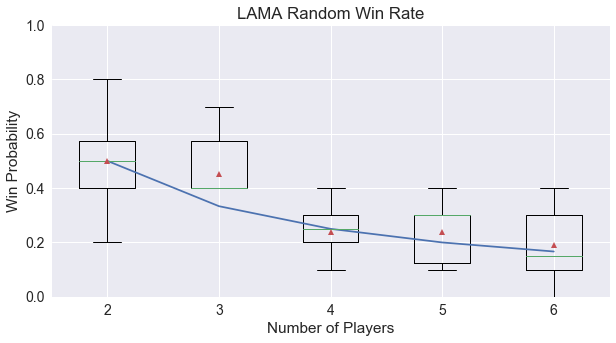

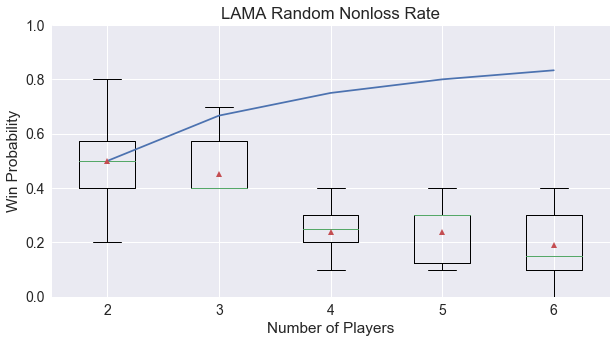

In [88]:
game = "LAMA"
type = "AllRnd"
w = 0.4
fpw = []
fpwerr = []
nl = []
nlerr = []
wvals = []

for nump in range(minP, maxP):
    fopen = open("../CardStockXam/bin/Release/games/" + game + str(nump) + ".gdl" + type + "-resultsstats.txt")
    data = fopen.readlines()
    fopen.close()
    score = []
    rank = []
    ranks = []
    allrank = []
    for i in range(nump):
        print(i, nump)
        print(4 + nump + 1 + i)
        #print(data)
        scores = [int(x) for x in data[4 + i][:-2].strip().split(",")]
        score.append(sum(scores) / count[type])
        ranks.append([int(x) for x in data[4 + nump + 1 + i][:-2].strip().split(",")])
        allrank.extend(ranks[i])
        rank.append(sum(ranks[i]) / count[type])
    maxr = np.max(allrank)
    fpw.append(len([x for x in ranks[0] if x == 0]) / count[type])
    nl.append(len([x for x in ranks[0] if x != maxr]) / count[type])

    vals = []
    v2 = []
    for j in range(epoch):
        x = len([x for x in ranks[0][epoch*j:epoch*(j+1)] if x == 0]) / (count[type]/epoch)
        vals.append(x)
        y = len([x for x in ranks[0][epoch*j:epoch*(j+1)] if x != maxr]) / (count[type]/epoch)
        v2.append(y)
    fpwerr.append(np.std(vals))
    nlerr.append(np.std(v2))
    wvals.append(vals)

expected = [1 / x for x in range(minP, len(fpw) + minP)]
ax = plt.figure(figsize=(10,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(0, 1)
plt.boxplot(wvals, labels=range(minP, maxP), showmeans=True)
plt.plot(range(1, maxP - 1), expected)
plt.xlabel("Number of Players")
plt.ylabel("Win Probability")
plt.title(game + " Random Win Rate")

expected = [(x - 1) / x for x in range(minP, len(fpw) + minP)]
ax = plt.figure(figsize=(10,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(0, 1)
plt.boxplot(wvals, labels=range(minP, maxP), showmeans=True)
plt.plot(range(1, maxP - 1), expected)
plt.xlabel("Number of Players")
plt.ylabel("Win Probability")
plt.title(game + " Random Nonloss Rate")



In [245]:
fpwerr

[0.18330302779823363]

In [246]:
rank

[1.33, 1.33, 1.45, 1.49]